In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

In [2]:
grade =  pandas.read_csv('StudentsPerformance.csv')
grade.columns = grade.columns.str.replace(' ', '_', )

lets plot total_score of male and female 

In [3]:
grade.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [4]:
# lets create a categorical varible sex male-1 female-0 
grade['sex'] = grade.gender.map({'male': 1, 'female': 0})

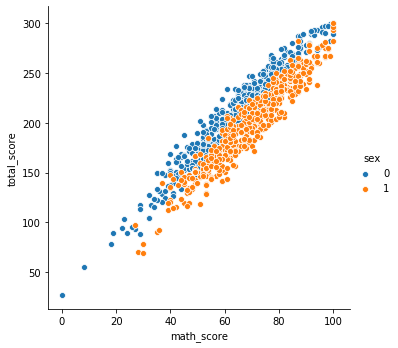

In [5]:
sns.pairplot(data=grade, hue= 'sex', x_vars='math_score', y_vars='total_score', height=5)

# lets see math_score vs total_score regression

In [6]:
# from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.api import interaction_plot, abline_plot


 # <font color='magenta'># sm.OLS(y,X) or sm.OLS.from_formula(formula, data)</font>

In [11]:
model_test = sm.OLS.from_formula('total_score ~ math_score + reading_score + writing_score ', data = grade)
model_test_results = model_test.fit()
print(model_test_results.summary())

                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.455e+30
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:09:10   Log-Likelihood:                 27394.
No. Observations:                1000   AIC:                        -5.478e+04
Df Residuals:                     996   BIC:                        -5.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.197e-14   4.78e-14     -0.668

The result shows all betas equal to 1 which can be anticipated because total_score afterall is sum of all three scores, a unit change in any of these will result in a unit change in the regrassand.

F-statistic probability basically says " is there a chance that all my co-efficients are zero if there is !! then whats the probability"

In [12]:
model = sm.OLS.from_formula('total_score ~ math_score + reading_score', data = grade) #  or ols('total_score ~ math_score', data = grade)
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 4.476e+04
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:09:41   Log-Likelihood:                -2920.0
No. Observations:                1000   AIC:                             5846.
Df Residuals:                     997   BIC:                             5861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1608      0.699     -1.662

In [13]:
model.df_model
model.df_resid
model.endog_names
model.exog_names

2.0

997.0

'total_score'

['Intercept', 'math_score', 'reading_score']

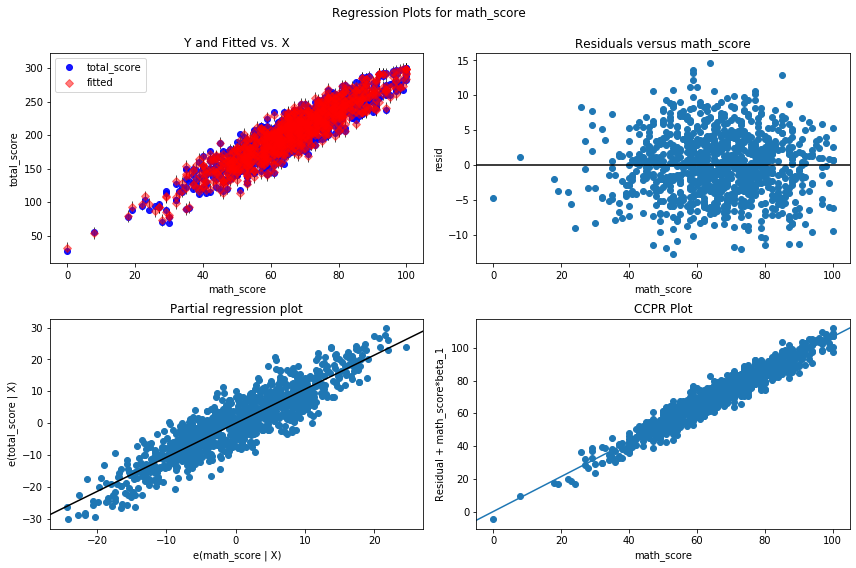

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_results, "math_score", fig=fig)

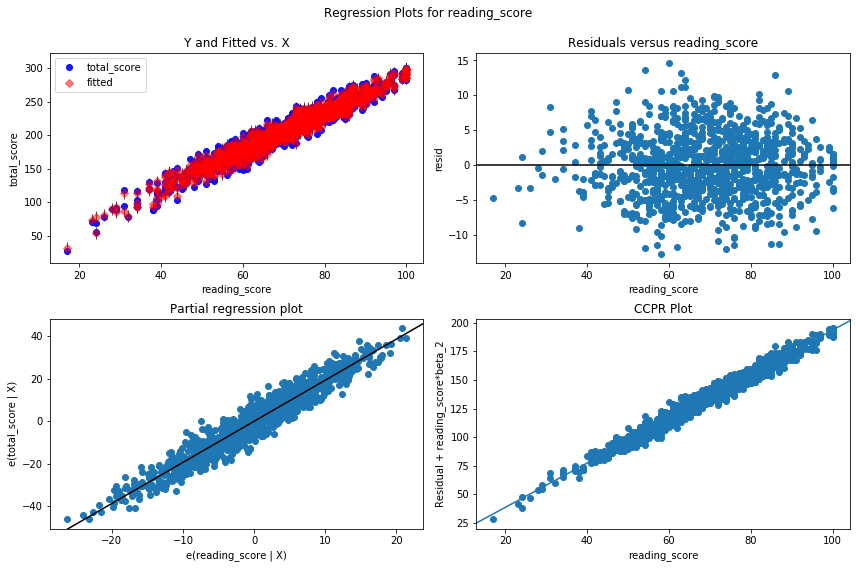

In [15]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_results, "reading_score", fig=fig)

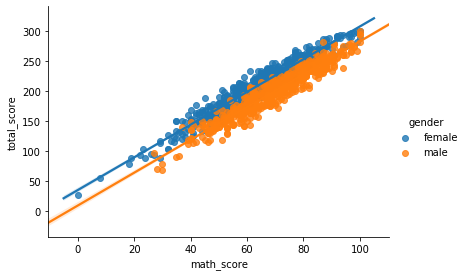

In [17]:
sns.pairplot(data=grade, x_vars='math_score', y_vars='total_score', height= 4, aspect=1.4, kind='reg', hue='gender')

## Okaylets do some prediction!!

In [18]:
model_results.params

model.predict(params= model_results.params, exog=[[1,72,72],[1,65,81]]) # see the original dataframe to check the predicted output

Intercept       -1.160844
math_score       1.067045
reading_score    1.936603
dtype: float64

array([215.10182719, 225.06193856])

# lets do some f-test to see which of the exog variables are important in combination

In [19]:
model_results.f_test('math_score =0 ') # how only reading_score and intercept affecting the total_score 
model_results.f_test('math_score =reading_score= 0 ') # how only intercept affecting the total_score 

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[4294.92537908]]), p=0.0, df_denom=997, df_num=1>

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[44763.85318615]]), p=0.0, df_denom=997, df_num=2>

# Now which model is better ? 

In [20]:
print(model_test_results.summary())
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.455e+30
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:11:55   Log-Likelihood:                 27394.
No. Observations:                1000   AIC:                        -5.478e+04
Df Residuals:                     996   BIC:                        -5.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.197e-14   4.78e-14     -0.668

In [21]:
model_test_results.compare_f_test(model_results) # middle term is the pvalue which says that model_test is 0.0 better than model_fit

(2.1328666012126758e+29, 0.0, 1.0)

In [23]:
# you can also compare as follows 
model_test_results.compare_lm_test(model_results)
model_test_results.compare_lr_test(model_results)

(999.9999999999504, 1.7958327848452306e-219, 1.0)

(60628.6873363227, 0.0, 1.0)